In [1]:
import yfinance as yf
import pandas as pd

# Scarica i dati di Apple (AAPL) ultimi 5 anni
ticker = "AAPL"
df = yf.download(ticker, start="2010-01-01", end="2024-01-01", interval="1d")

# Converti l'indice datetime in stringa per il plot
df["Date"] = df.index.strftime("%Y-%m-%d")

# Visualizziamo le prime righe
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume        Date
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL            
Date                                                                     
2010-01-04  6.440330  6.455076  6.391278  6.422876  493729600  2010-01-04
2010-01-05  6.451464  6.487877  6.417458  6.458085  601904800  2010-01-05
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000  2010-01-06
2010-01-07  6.337110  6.379843  6.291067  6.372319  477131200  2010-01-07
2010-01-08  6.379239  6.379841  6.291367  6.328682  447610800  2010-01-08


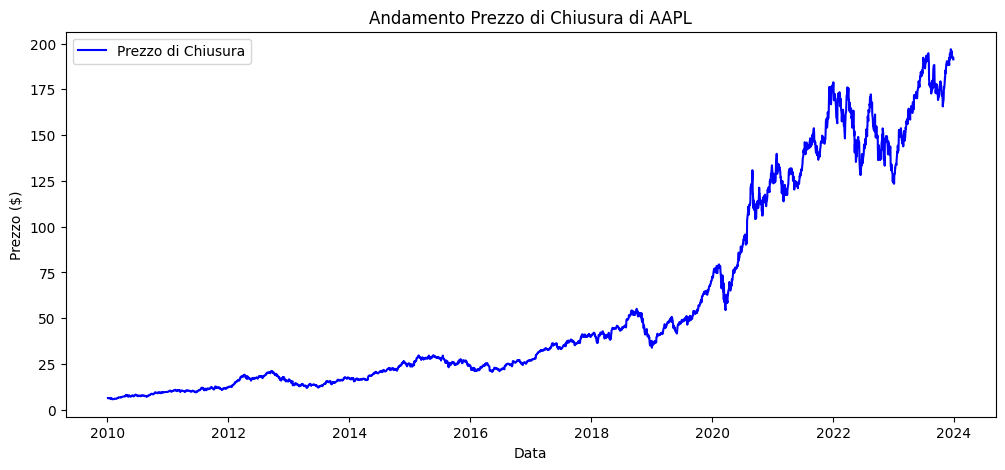

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Prezzo di Chiusura", color="blue")
plt.xlabel("Data")
plt.ylabel("Prezzo ($)")
plt.title(f"Andamento Prezzo di Chiusura di {ticker}")
plt.legend()
plt.show()

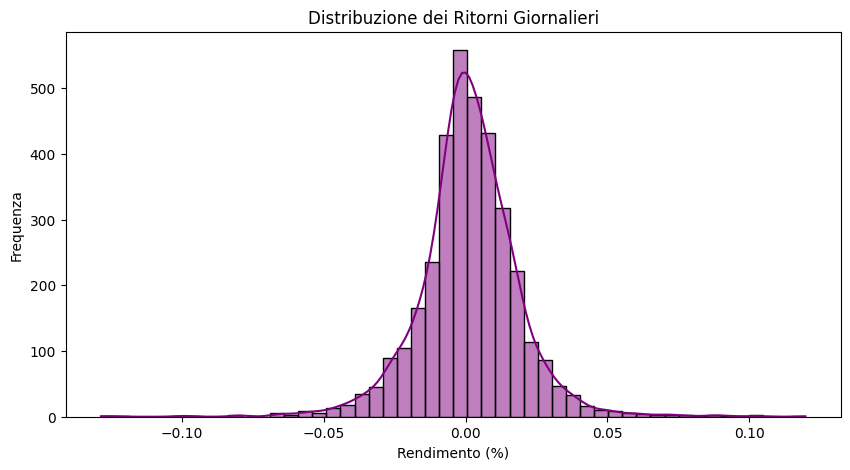

In [3]:
import seaborn as sns
import numpy as np

df["Return"] = df["Close"].pct_change()  # Rendimento giornaliero
df.dropna(inplace=True)  # Rimuoviamo valori NaN

plt.figure(figsize=(10, 5))
sns.histplot(df["Return"], bins=50, kde=True, color="purple")
plt.xlabel("Rendimento (%)")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Ritorni Giornalieri")
plt.show()

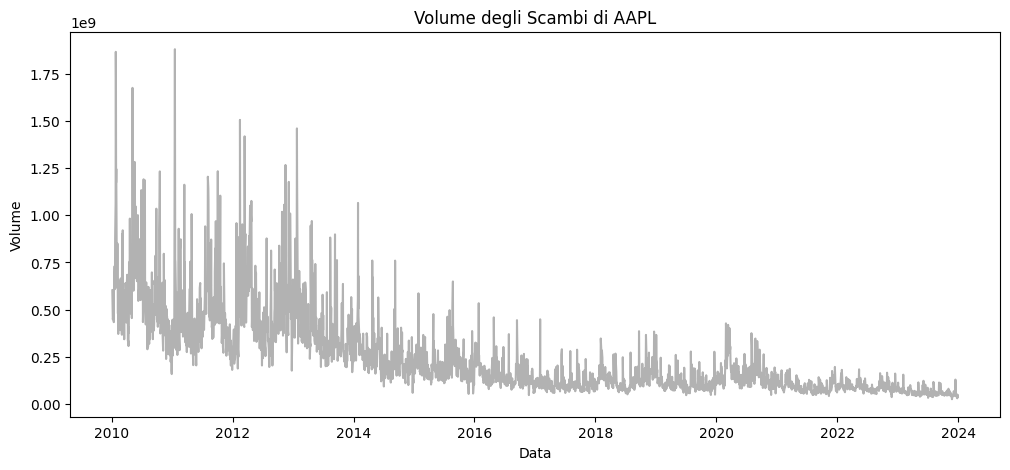

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Volume"], color="gray", alpha=0.6)
plt.xlabel("Data")
plt.ylabel("Volume")
plt.title(f"Volume degli Scambi di {ticker}")
plt.show()

In [5]:
# Media Mobile a 50 e 200 giorni
df["SMA50"] = df["Close"].rolling(window=50).mean()
df["SMA200"] = df["Close"].rolling(window=200).mean()

# Volatilità su 10 giorni
df["Volatility"] = df["Return"].rolling(window=10).std()

# Momentum (differenza tra prezzo attuale e di 10 giorni fa)
df["Momentum"] = df["Close"] - df["Close"].shift(10)

# RSI (Relative Strength Index)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["RSI"] = compute_rsi(df["Close"], window=14)

# Rimuoviamo i valori NaN
df.dropna(inplace=True)

# Visualizziamo le nuove feature
print(df[["SMA50", "SMA200", "Volatility", "Momentum", "RSI"]].head())

Price          SMA50    SMA200 Volatility  Momentum        RSI
Ticker                                                        
Date                                                          
2010-10-19  8.167908  7.401790   0.016731  0.618423  69.540781
2010-10-20  8.198676  7.416257   0.016648  0.642198  74.787036
2010-10-21  8.234385  7.431086   0.016841  0.610903  75.093157
2010-10-22  8.267897  7.445665   0.016947  0.403261  77.737322
2010-10-25  8.303853  7.460239   0.016947  0.405659  73.118043


In [6]:
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Feature e target
features = ["SMA50", "SMA200", "Volatility", "Momentum", "RSI"]
X = df[features]
y = df["Target"]

# Suddivisione train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creiamo il modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predizione e valutazione
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.43      0.50      0.46       284
           1       0.58      0.51      0.54       381

    accuracy                           0.51       665
   macro avg       0.51      0.51      0.50       665
weighted avg       0.52      0.51      0.51       665



In [8]:
latest_data = df.iloc[-1][features].values.reshape(1, -1)
pred = model.predict(latest_data)

if pred[0] == 1:
    print(f"📈 Il modello prevede che {ticker} salirà domani!")
else:
    print(f"📉 Il modello prevede che {ticker} scenderà domani.")

📉 Il modello prevede che AAPL scenderà domani.


In [15]:
# 1. Scarichiamo i dati
TICKER = "AAPL"
df = yf.download(TICKER, start="2010-01-01", end="2025-01-01", interval="1d")

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455076,6.391278,6.422876,493729600
2010-01-05,6.451464,6.487877,6.417458,6.458085,601904800
2010-01-06,6.348845,6.477044,6.342224,6.451464,552160000
2010-01-07,6.337111,6.379844,6.291068,6.372321,477131200
2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800


[*********************100%***********************]  1 of 1 completed


Epoch 1/20, Loss: 0.007996
Epoch 2/20, Loss: 0.000100
Epoch 3/20, Loss: 0.000097
Epoch 4/20, Loss: 0.000099
Epoch 5/20, Loss: 0.000104
Epoch 6/20, Loss: 0.000083
Epoch 7/20, Loss: 0.000134
Epoch 8/20, Loss: 0.000083
Epoch 9/20, Loss: 0.000076
Epoch 10/20, Loss: 0.000093
Epoch 11/20, Loss: 0.000071
Epoch 12/20, Loss: 0.000066
Epoch 13/20, Loss: 0.000068
Epoch 14/20, Loss: 0.000080
Epoch 15/20, Loss: 0.000067
Epoch 16/20, Loss: 0.000078
Epoch 17/20, Loss: 0.000063
Epoch 18/20, Loss: 0.000064
Epoch 19/20, Loss: 0.000060
Epoch 20/20, Loss: 0.000064


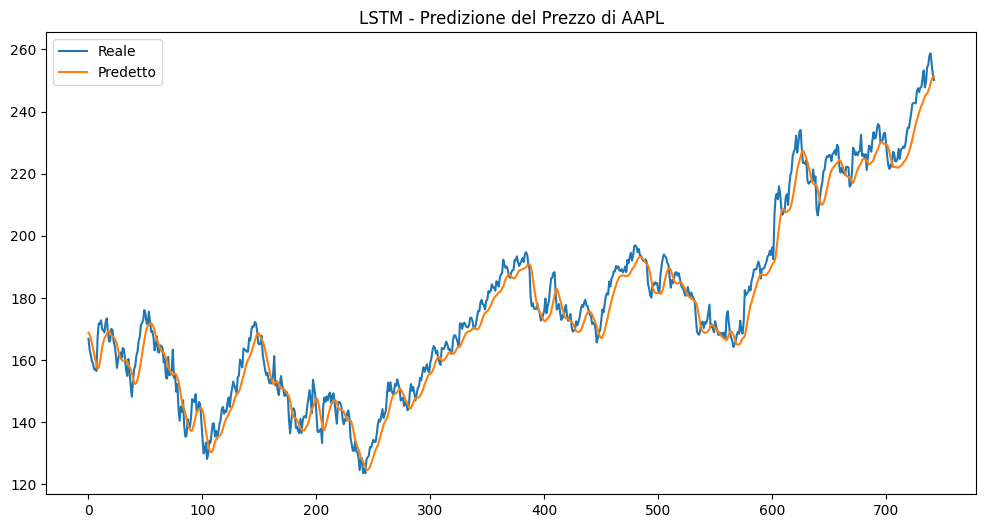

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# 1. Scarichiamo i dati
TICKER = "AAPL"
df = yf.download(TICKER, start="2010-01-01", end="2025-01-01", interval="1d")

# 2. Preprocessing
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Close']].values)

# Funzione per creare sequenze per l'LSTM
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 60  # 60 giorni di storico per predire il futuro
X, y = create_sequences(data, SEQ_LENGTH)

# Divisione train/test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Conversione in tensori
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Dataset e DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(TimeSeriesDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TimeSeriesDataset(X_test, y_test), batch_size=32, shuffle=False)

# 3. Creazione del modello LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Addestramento del modello
EPOCHS = 20
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.6f}")

# 5. Valutazione
model.eval()
y_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        y_preds.extend(model(X_batch).squeeze().tolist())

# Riportiamo i risultati alla scala originale
y_test_actual = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
y_preds_actual = scaler.inverse_transform(np.array(y_preds).reshape(-1, 1))

# Grafico
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Reale")
plt.plot(y_preds_actual, label="Predetto")
plt.legend()
plt.title("LSTM - Predizione del Prezzo di AAPL")
plt.show()

Mean Squared Error (MSE): 27.5617
Root Mean Squared Error (RMSE): 5.2499
Mean Absolute Error (MAE): 4.2729
R² Score: 0.9689


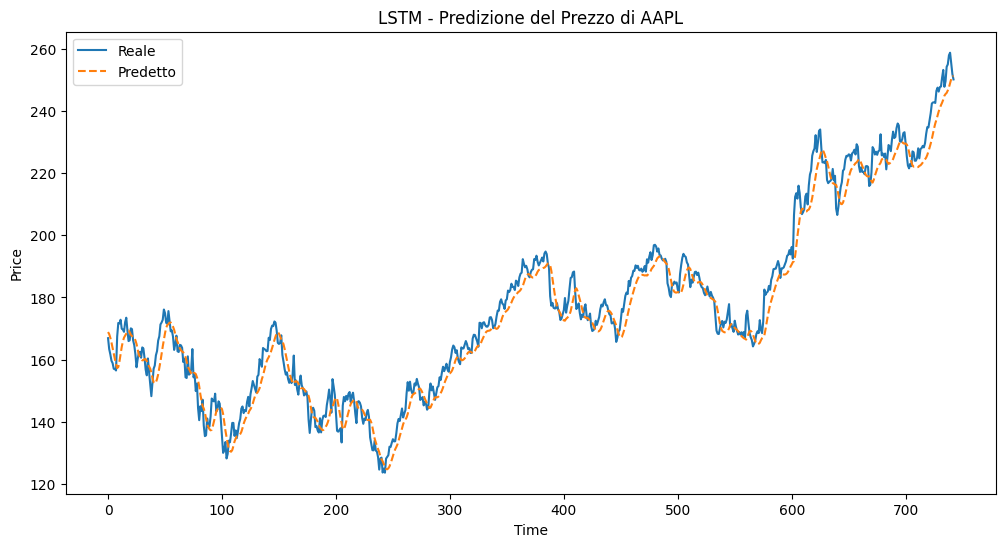

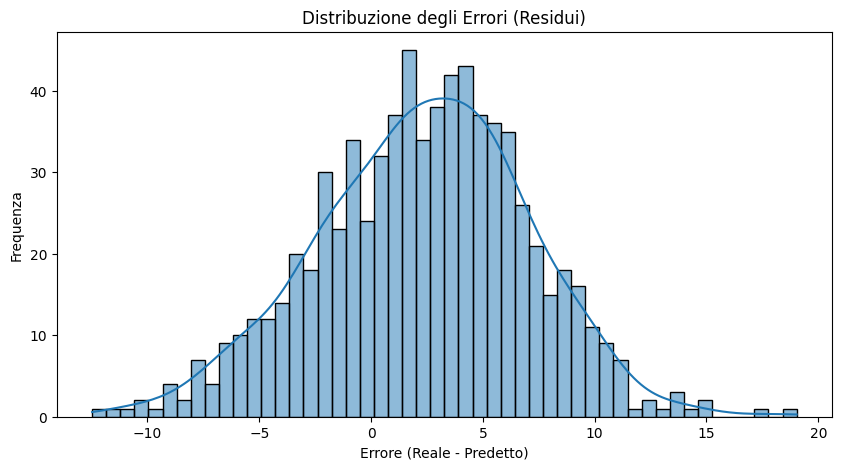

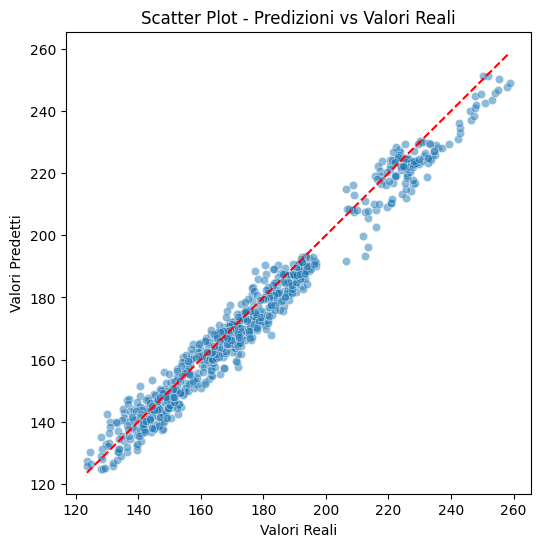

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Calcolo metriche
mse = mean_squared_error(y_test_actual, y_preds_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_preds_actual)
r2 = r2_score(y_test_actual, y_preds_actual)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 2. Grafico predizioni vs valori reali
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Reale")
plt.plot(y_preds_actual, label="Predetto", linestyle="--")
plt.legend()
plt.title("LSTM - Predizione del Prezzo di AAPL")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

# 3. Distribuzione degli errori (residui)
errors = y_test_actual.flatten() - y_preds_actual.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribuzione degli Errori (Residui)")
plt.xlabel("Errore (Reale - Predetto)")
plt.ylabel("Frequenza")
plt.show()

# 4. Scatter plot: Predizioni vs Valori Reali
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_actual.flatten(), y=y_preds_actual.flatten(), alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'r--')  # Linea di riferimento y=x
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Scatter Plot - Predizioni vs Valori Reali")
plt.show()